## Transform Kaggle to resemble MNIST

In [68]:
import cv2
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D
from keras.models import Sequential
from keras.utils import to_categorical
import matplotlib.pyplot as plt



----------------Contoured Image--------------------


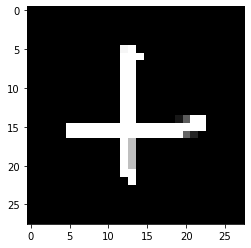

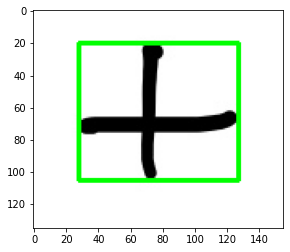

In [85]:
image = cv2.imread('/Users/davidperez/Documents/GitHub/ideal-funicular/datasets/kaggle_dataset/23.jpg')
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV+ cv2.THRESH_OTSU)
contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
preprocessed_digits = []
bounded_digits = []
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    
    # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
    cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)
    
    # Cropping out the digit from the image corresponding to the current contours in the for loop
    digit = thresh[y:y+h, x:x+w]
    
    resized_digit = cv2.resize(digit, (18,18))
    
    # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
    padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
    
    # Adding the preprocessed digit to the list of preprocessed digits
    preprocessed_digits.append(padded_digit)
    # bounded_digits.append(digit)

print("\n----------------Contoured Image--------------------")

plt.imshow(preprocessed_digits[0], cmap="gray")
plt.show()
plt.imshow(image, cmap="gray")
plt.show()
    


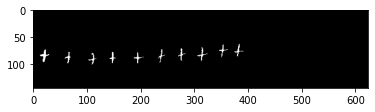

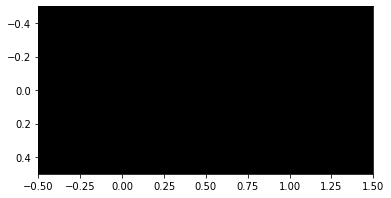

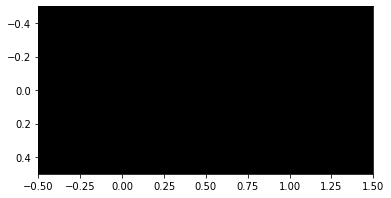

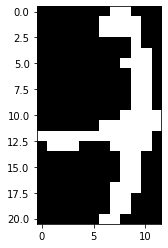

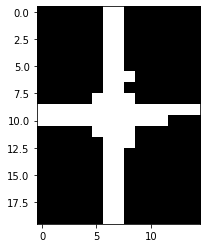

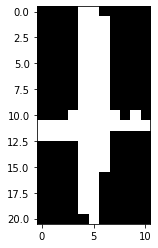

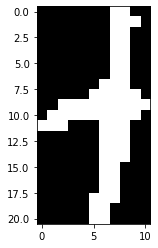

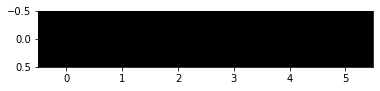

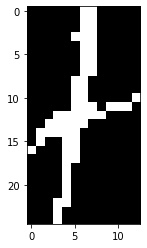

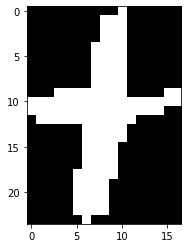

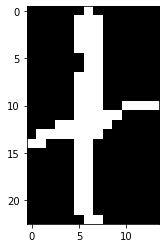

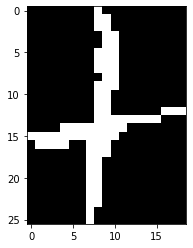

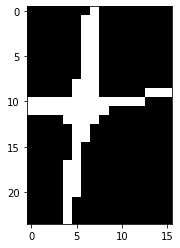

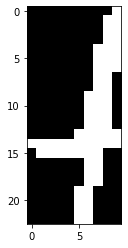


----------------Contoured Image--------------------


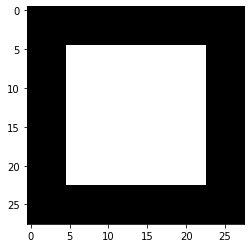

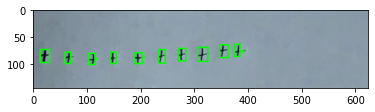

In [22]:
image = cv2.imread('IMG_8842.jpg')
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV)
plt.imshow(thresh, cmap="gray")
plt.show()
contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
preprocessed_digits = []
bounded_digits = []
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    
    # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
    cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)
    
    # Cropping out the digit from the image corresponding to the current contours in the for loop
    digit = thresh[y:y+h, x:x+w]

    plt.imshow(digit, cmap="gray")
    plt.show()
    
    resized_digit = cv2.resize(digit, (18,18))
    
    # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
    padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
    
    # Adding the preprocessed digit to the list of preprocessed digits
    preprocessed_digits.append(padded_digit)
    # bounded_digits.append(digit)

print("\n----------------Contoured Image--------------------")

plt.imshow(preprocessed_digits[0], cmap="gray")
plt.show()
plt.imshow(image, cmap="gray")
plt.show()
    


In [ ]:

plt.imshow(digit)

In [5]:
import math


----------------Original Image--------------------


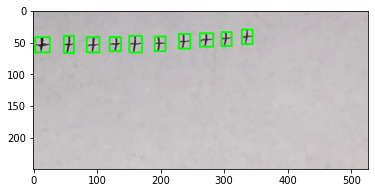

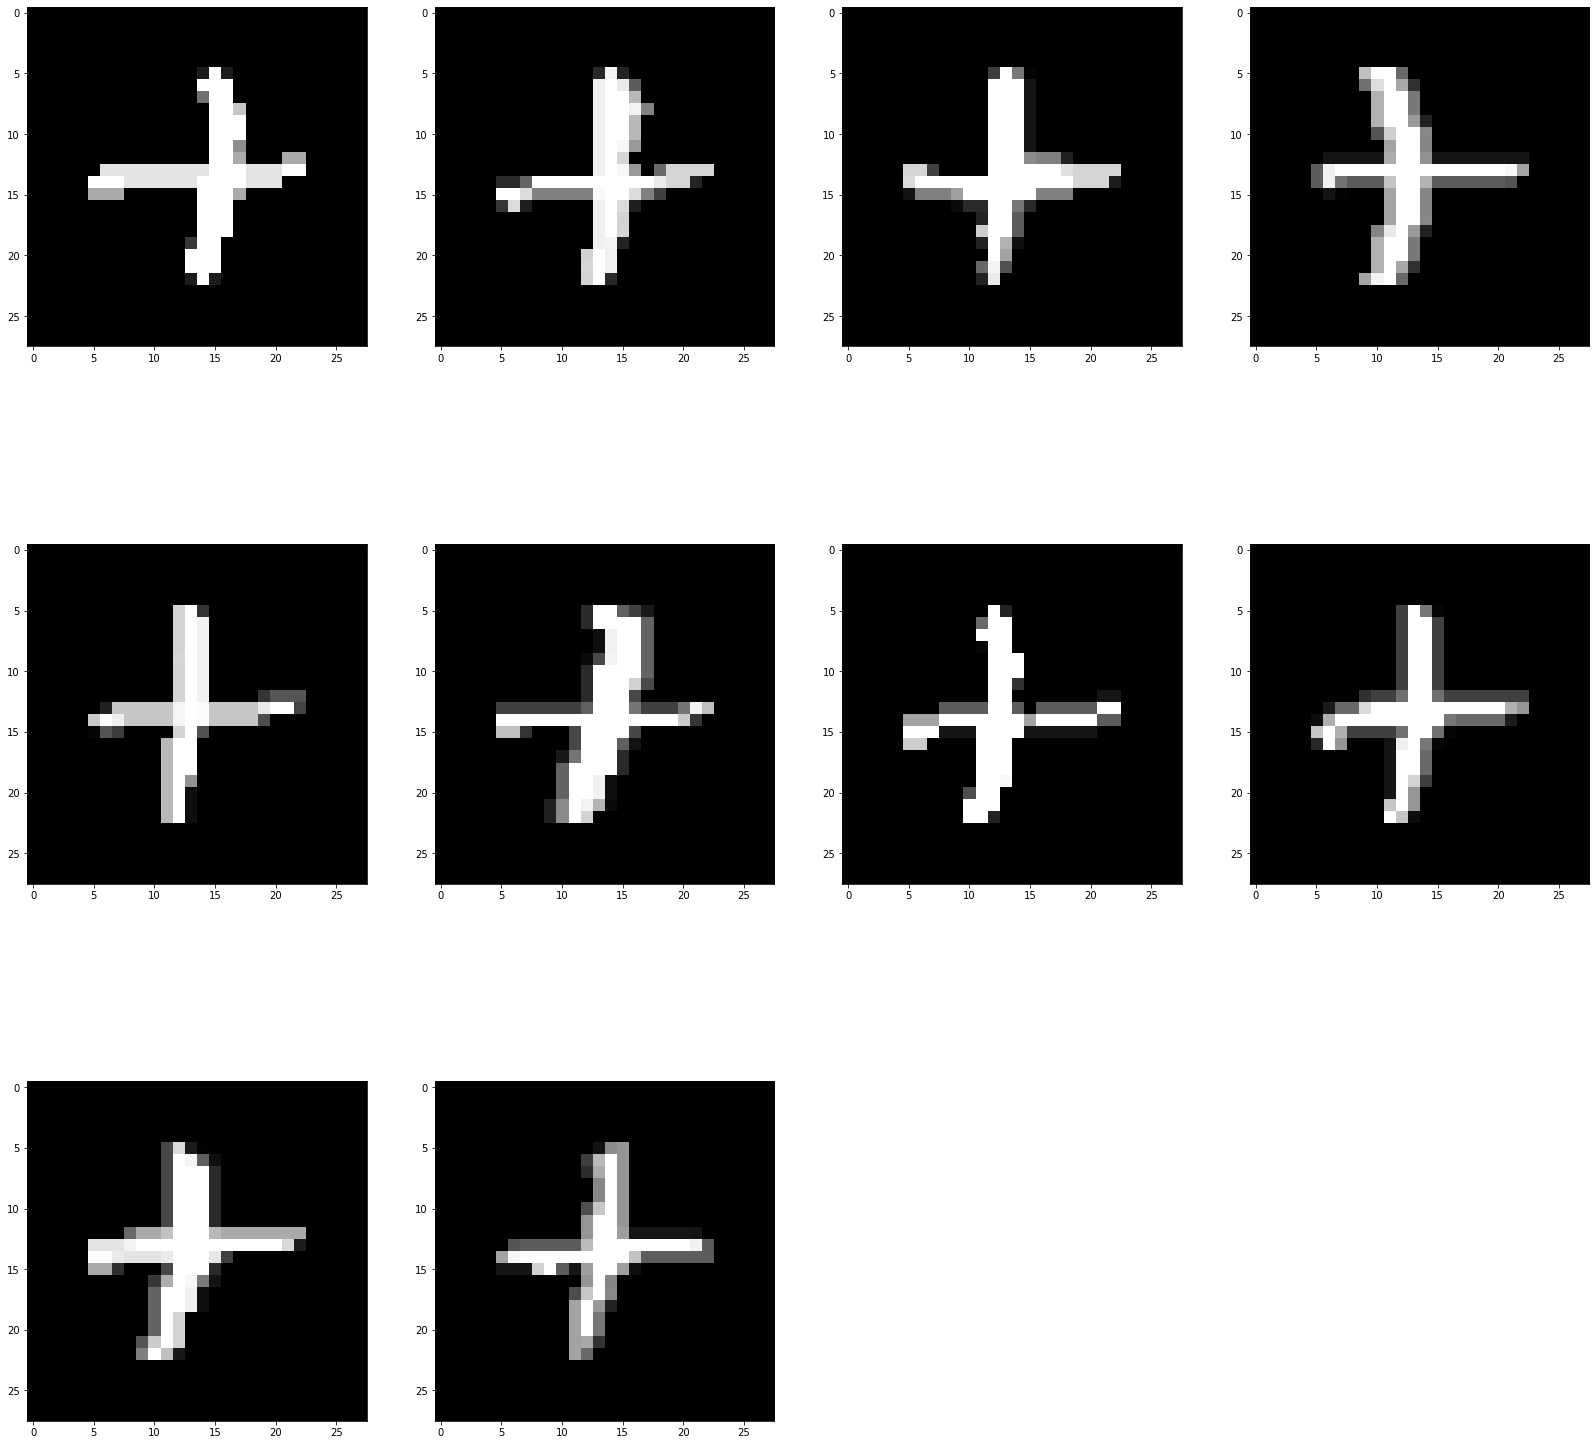

In [121]:
image = cv2.imread('./add_secondSetFlash.jpg')
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
preprocessed_digits = []
bounded_digits = []
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    
    # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
    cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)
    
    # Cropping out the digit from the image corresponding to the current contours in the for loop
    digit = thresh[y:y+h, x:x+w]
    
    # @todo create a ratio to better square a general image
    # CHANGE NARROW OBJECTS TO SOON BE (18,18) PIXEL DIGIT
    # HAND SCENARIO WHEN IMAGE IS NARROW; y pixel length is less than 10 pixels
    x, y = digit.shape


    padded_digit = digit.copy()

    if (y < 10):
        # Padd x-axis
        difference = round((28 - y)/2)
        padded_digit = np.pad(padded_digit, ((0,0),(difference,difference)),"constant", constant_values=0)

    # Resize digit
    resized_digit = cv2.resize(padded_digit, (18,18))
    
    # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
    padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
    
    # Adding the preprocessed digit to the list of preprocessed digits
    preprocessed_digits.append(padded_digit)
    # bounded_digits.append(digit)

print("\n----------------Original Image--------------------")
plt.imshow(image)
plt.show()

inp = np.array(preprocessed_digits)

bounded_digit_index = 0

columns = 4
rows = math.ceil( len(preprocessed_digits) / columns)
fig = plt.figure(figsize=(28, 28))

for i in range(1, rows*columns - 1):
    # Make prediction on each image before plotting
    # prediction = model.predict(preprocessed_digits[i-1].reshape(1, 28, 28, 1))

    p = fig.add_subplot(rows, columns, i)
    # plt.xlabel('PREDICTION: {0}'.format(np.argmax(prediction)), fontsize=30)    
    plt.imshow(preprocessed_digits[i - 1], cmap='gray')

    

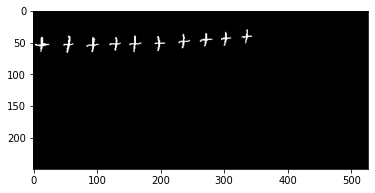

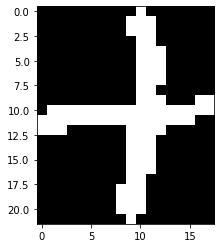

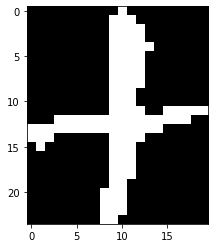

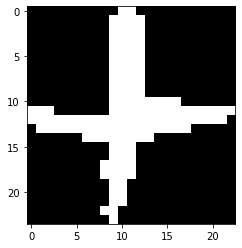

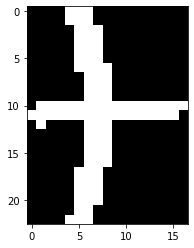

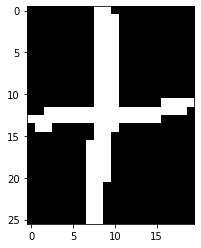

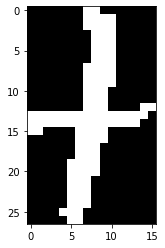

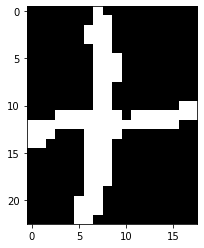

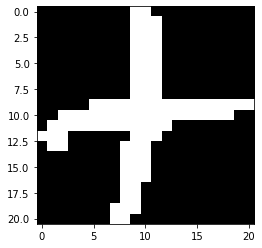

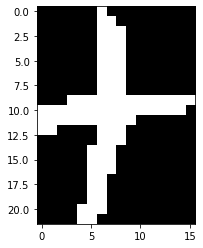

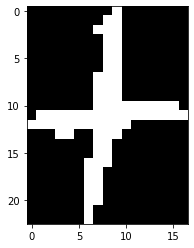


----------------Contoured Image--------------------


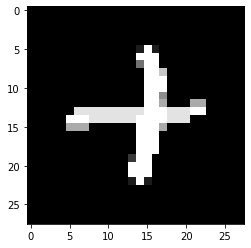

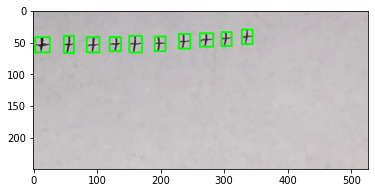

In [88]:
# @todo TRY OPTIONS FOR GETTING ONLY THE PROPER OBJECT
#       POTENTIAL OPTIONS: it appears that the contouring is picking up images that strictly
#       contain a ratio where majority of the pixels are non zero (black). 
#       If ratio of non black pixels is less than 95% then remove the contour entirely.




## THE KEY CHANGES WERE ADDING OTSUS THRESHOLDING TO IMAGE RECOGNITION
# SEE THIS STACK OVERFLOW FOR REMOVING NOISE:
# https://stackoverflow.com/questions/62042172/how-to-remove-noise-in-image-opencv-python

image = cv2.imread('add_secondSetFlash.jpg')
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(thresh, cmap="gray")
plt.show()
contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
preprocessed_digits = []
bounded_digits = []

SPECIAL_DIGIT = 0

j = 0
for c in contours:
    x,y,w,h = cv2.boundingRect(c)


    # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
    cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)
    
    # Cropping out the digit from the image corresponding to the current contours in the for loop
    digit = thresh[y:y+h, x:x+w]

    # CHANGES START
    if (j == 0):
      # SPECIAL_DIGIT.append(digit)
      SPECIAL_DIGIT = digit
    j += 1
    plt.imshow(digit, cmap="gray")
    plt.show()
    #CHANGES END
    
    resized_digit = cv2.resize(digit, (18,18))
    
    # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
    padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
    
    # Adding the preprocessed digit to the list of preprocessed digits
    preprocessed_digits.append(padded_digit)
    # bounded_digits.append(digit)

print("\n----------------Contoured Image--------------------")

plt.imshow(preprocessed_digits[0], cmap="gray")
plt.show()
plt.imshow(image, cmap="gray")
plt.show()
    


In [51]:
from keras.datasets import mnist

(train_x, train_y), (test_x, test_y) = mnist.load_data()

print(len(train_x))
print(train_y)
i = 0
for num in train_y:
  if num == 2:
    i += 1
x = 0
for num in test_y:
  if num == 2:
    x += 1
# one = 0
# for i in range(0, len(train_y)):
#   if 9 == train_y[i]:
#     one += 1

print(i)
print(x)
print("one", one)

60000
[5 0 4 ... 5 6 8]
5958
1032
one 5949


### Performing Preprocessing For All Images in "add" Directory

DISPLAYING FIRST 8 digits


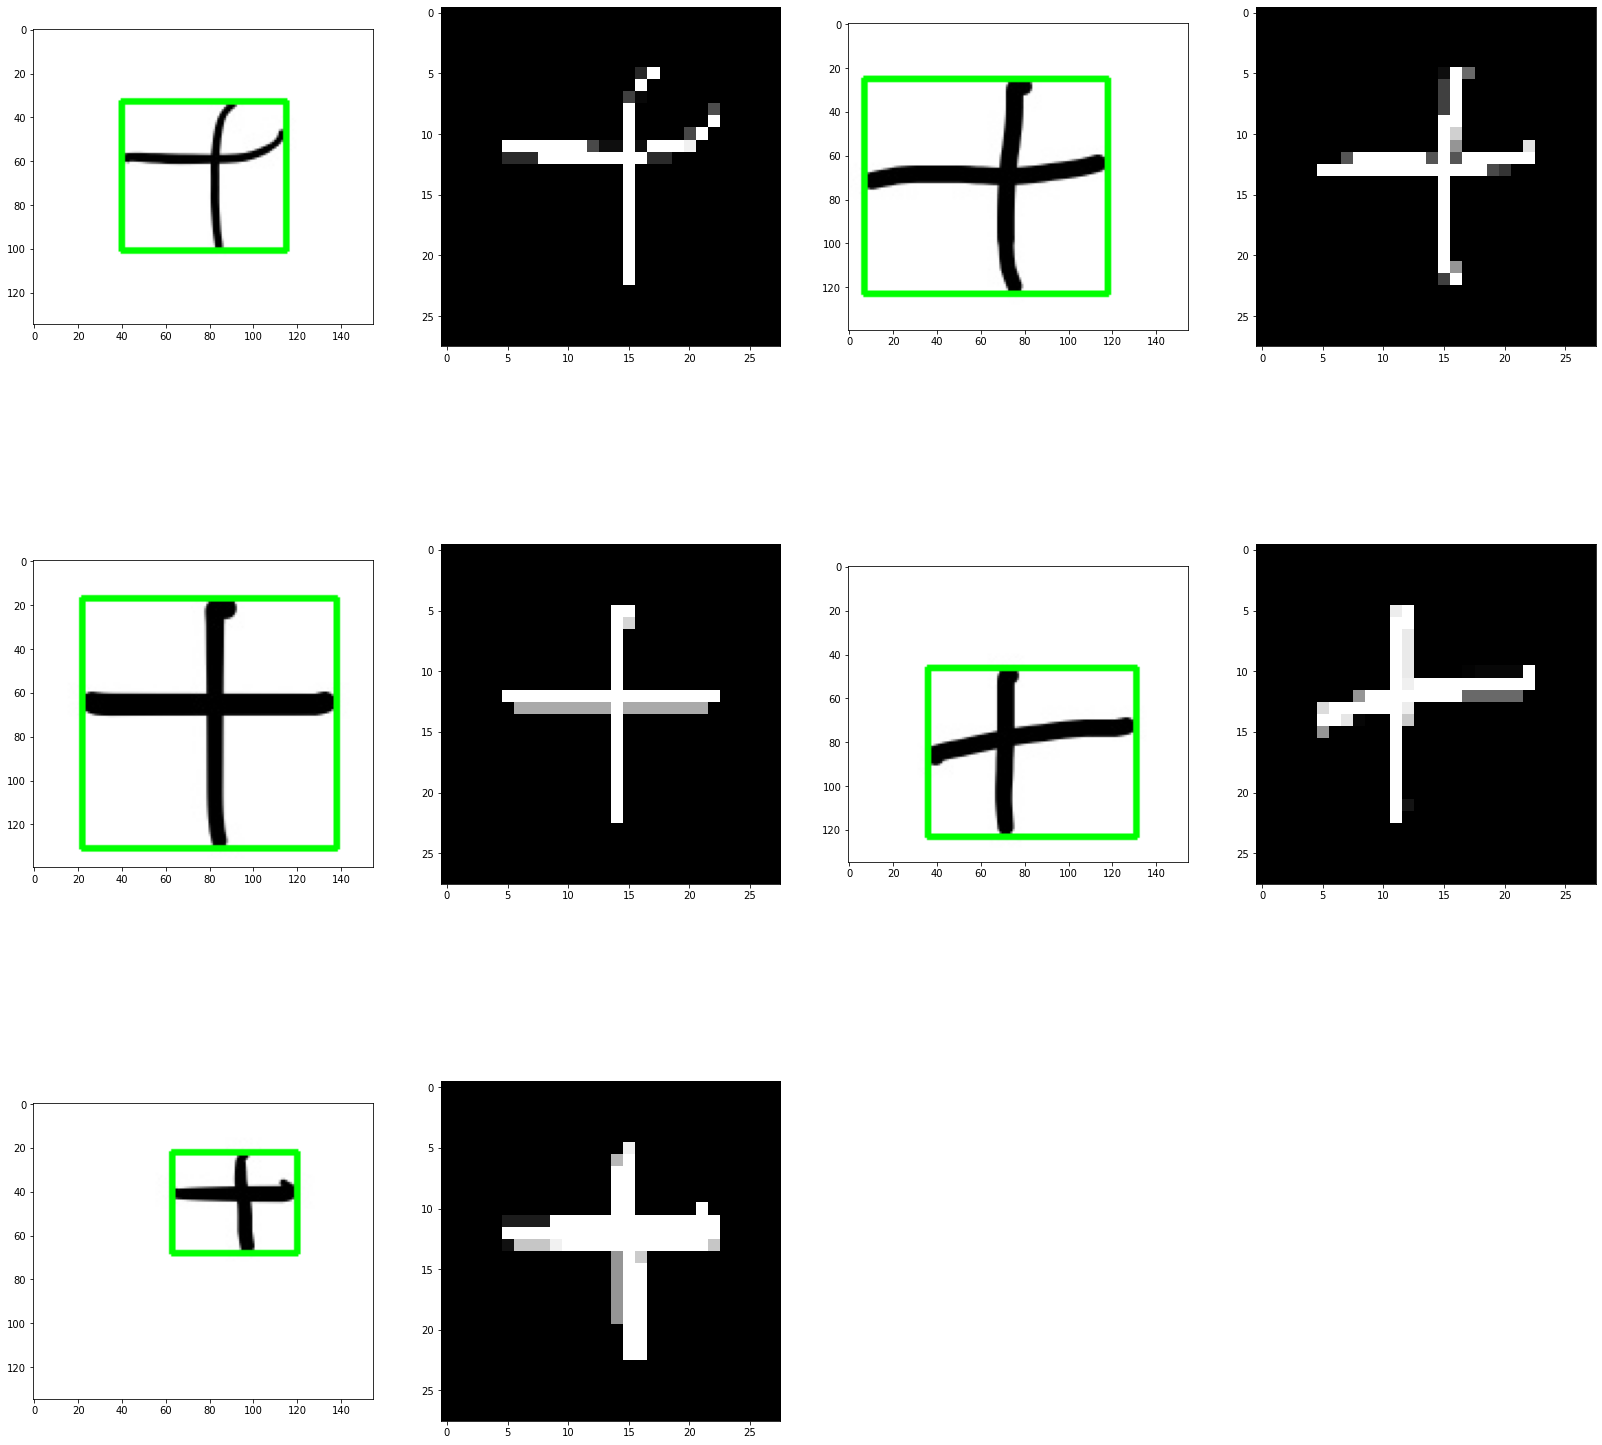

In [124]:
# import cv2
import os

def save_img_to_add_preproc_dir(img_name, img):
  add_preproc_path = "./kaggle_dataset/add_preproc/"

  cv2.imwrite(add_preproc_path + img_name, img)


# @@@@@@@@@@@Preprocessing pipeline @@@@@@@@@@@@@@@@@@@@
# Consider adding noise removal: https://stackoverflow.com/questions/62042172/how-to-remove-noise-in-image-opencv-python 
def preprocess_pipeline(img):

  # Create Grayscale Copy and apply contours
  grey = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2GRAY)
  ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
  contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  bounded_img = None
  processed_digit = None

  for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    
    # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
    cv2.rectangle(img, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)

    # Save copy of bounded image
    bounded_img = img
    
    # Cropping out the digit from the image corresponding to the current contours in the for loop
    digit = thresh[y:y+h, x:x+w]
    
    # @todo create a ratio to better square a general image
    # CHANGE NARROW OBJECTS TO SOON BE (18,18) PIXEL DIGIT
    # HAND SCENARIO WHEN IMAGE IS NARROW; y pixel length is less than 10 pixels
    x, y = digit.shape

    padded_digit = digit.copy() # WHY THIS HERE

    if (y < 10):
        # Padd x-axis
        difference = round((28 - y)/2)
        padded_digit = np.pad(padded_digit, ((0,0),(difference,difference)),"constant", constant_values=0)

    # Resize digit
    resized_digit = cv2.resize(padded_digit, (18,18))
    
    # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
    padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
    
    # Update image argument with processed form
    processed_digit = padded_digit

  return bounded_img, processed_digit

def display_list_of_images(images_list):
  columns = 4
  rows = math.ceil( len(preprocessed_digits) / columns)
  fig = plt.figure(figsize=(28, 28))

  for i in range(1, rows*columns - 1):
    # Make prediction on each image before plotting
    # prediction = model.predict(preprocessed_digits[i-1].reshape(1, 28, 28, 1))
    p = fig.add_subplot(rows, columns, i)
    # plt.xlabel('PREDICTION: {0}'.format(np.argmax(prediction)), fontsize=30)    
    plt.imshow(images_list[i - 1], cmap='gray')



# BEGGINNING OF MAIN SCRIPT

# Get list of all file names of images in kaggle_dataset/add
# @todo Make the listings be in ascending order
image_names = os.listdir("./kaggle_dataset/add")
# image_names.sort(key=lambda f: int(filter(str.isdigit, f)))

preproc_digits = []
boundeds = []
# perform 
for i in range(0,len(image_names)):

  image = cv2.imread("./kaggle_dataset/add/" + image_names[i])

  # performs bounding inplace still (copy img into bounded image before thresh slice)
  bounded_img, preproc_img = preprocess_pipeline(image)

  preproc_digits.append(bounded_img)
  preproc_digits.append(preproc_img)

  # Save preproc image to new folder
  save_img_to_add_preproc_dir(image_names[i],  preproc_img)

# DISPLAYING IMAGES TO SEE OPERATION maybe display first 8?
num_digits_display = 8
print(f"DISPLAYING FIRST {num_digits_display} DIGITS")
first_ten_digits = preproc_digits[:num_digits_display]
display_list_of_images(preproc_digits)



In [120]:
print(len(image_names))


pre_image_names = os.listdir("./kaggle_dataset/add_preproc")
print(len(pre_image_names))


566
566
